This summer might be one of California's most unfortunate summers in history. The state is going through a tripple-whammy situation: covid-19 outbreak, heat wave and a wildfire.

The wildfire is buring about 780 square miles across the state. How many square miles will be burned? Can we predict that? The goal of this notebook is to build a model that predicts the burn area of wildfire.

### Table of content

- [Neural network regression with Keras](#Neural_network_regression)
- [Multiple linear regression with TensorFlow](#ML_with_TensorFlow)
- [Support vector machine for regression](#SVM_for_regression)

<a id='Neural_network_regression'></a>
#### I. Neural  network regression

(1) Load the data.

In [1]:
import pandas as pd
df=pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Descriptions of the features in the dataset: <br>
- X - x-axis spatial coordinate within a reference location map. Values range from 1 to 9.
- Y - y-axis spatial coordinate within a reference location map. Values range form 2 to 9.
- month - month of the year: 'jan' to 'dec'
- day - day of the week: 'mon' to 'sun'
- FFMC - FFMC index from the Fire Weather Index (FWI) system: 18.7 to 96.20
- DMC - DMC index from the FWI system: 1.1 to 291.3
- DC - DC index from the FWI system: 7.9 to 860.6
- ISI - ISI index from the FWI system: 0.0 to 56.10
- temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40
- rain - outside rain in mm/m2 : 0.0 to 6.4
- area - the burned area of the forest (in ha): 0.00 to 1090.84

The dataset has two categorical variables: "month" and "day". We are going to assign integer labels to those two categorical variables.

(2) Assign integer label to "month".

In [2]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
data=df["month"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
month_integer_encoder=pd.DataFrame(data=integer_encoder)
df=df.assign(month_code=month_integer_encoder.values)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_code
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,7
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,7


We see that the algorithm did not assign "3" to March. Let's print out the values of "month" column and "month_code" column to see what integer label was assigned to what month.

(3) Print out the months and their corresponding integer labels.

In [3]:
import numpy as np
print(np.unique(df["month"]))
print(np.unique(df["month_code"]))

['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
[ 0  1  2  3  4  5  6  7  8  9 10 11]


(4) Assign integer label to "day".

In [4]:
data=df["day"]
values=array(data)
label_encoder=LabelEncoder()
integer_encoder=label_encoder.fit_transform(values)
day_integer_encoder=pd.DataFrame(data=integer_encoder)
df=df.assign(day_code=day_integer_encoder.values)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_code,day_code
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,7,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,5
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,7,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,7,3


(5) Print out the values of "day" column and their corresponding integer labels.

In [5]:
print(np.unique(df["day"]))
print(np.unique(df["day_code"]))

['fri' 'mon' 'sat' 'sun' 'thu' 'tue' 'wed']
[0 1 2 3 4 5 6]


(6) Drop the "month" and "day" columns.

In [6]:
df=df.drop(["month","day"],axis=1)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_code,day_code
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,7,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,5
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,2
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,7,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,7,3


(7) Seperate the predictor variables and target variable.

In [7]:
pred=df.drop(["area"],axis=1)
tar=df[["area"]]

In [8]:
print(pred.head())
print(tar.head())

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  month_code  day_code
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0           7         0
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0          10         5
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0          10         2
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2           7         0
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0           7         3
   area
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0


(8) Compute feature importance scores for the predictor variables.

In [9]:
# Import the libraries.
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(pred, tar)
features = fit.transform(pred)
# summarize scores
set_printoptions(precision=3)

# Sort the feature scores in ascending order.
scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,scores
0,0.000000
8,0.000000
11,0.000000
1,0.010749
9,0.015295
6,0.021843
7,0.023025
2,0.024001
3,0.026246
4,0.040500


In [10]:
print("The most important feature is: ",pred.iloc[:,10].name)

The most important feature is:  month_code


In [11]:
print("The least important feature is: ",pred.iloc[:,0].name)

The least important feature is:  X


According to the feature selection algorithm, the most important features are:

In [12]:
pred.iloc[:,[10,7,4,5,3,6]].columns

Index(['month_code', 'RH', 'DC', 'ISI', 'DMC', 'temp'], dtype='object')

(9) Select the most important features.

In [13]:
pred=pred.iloc[:,[10,7,4,5,3,6]]
pred.head()

,month_code,RH,DC,ISI,DMC,temp
0,7,51,94.3,5.1,26.2,8.2
1,10,33,669.1,6.7,35.4,18.0
2,10,33,686.9,6.7,43.7,14.6
3,7,97,77.5,9.0,33.3,8.3
4,7,99,102.2,9.6,51.3,11.4


(10) Standardize the data.

In [14]:
from sklearn import preprocessing
names=pred.columns
scaler_x=preprocessing.StandardScaler()
pred=scaler_x.fit_transform(pred)
pred=pd.DataFrame(pred, columns=names)
pred.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,month_code,RH,DC,ISI,DMC,temp
0,0.284222,0.411724,-1.830477,-0.860946,-1.323326,-1.842640
1,0.970871,-0.692456,0.488891,-0.509688,-1.179541,-0.153278
2,0.970871,-0.692456,0.560715,-0.509688,-1.049822,-0.739383
3,0.284222,3.233519,-1.898266,-0.004756,-1.212361,-1.825402
4,0.284222,3.356206,-1.798600,0.126966,-0.931043,-1.291012


In [15]:
names=tar.columns
scaler_y=preprocessing.StandardScaler()
tar=scaler_y.fit_transform(tar)
tar=pd.DataFrame(tar, columns=names)

(11) Import libraries for the neural network regression model.

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

(12) Build the neural network regression model.

In [18]:
num_cols=pred.shape[1]
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(80, activation='relu', input_shape=(num_cols,)))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(80, activation ='relu'))
    model.add(Dense(80,activation='tanh'))
    model.add(Dense(1))
# "50" is the number of nodes in each of the three hidden layers.    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [19]:
# build the model
model = regression_model()

In [26]:
# fit the model
model.fit(pred,tar, validation_split=0.2, epochs=50, verbose=2)

Train on 413 samples, validate on 104 samples
Epoch 1/50
 - 0s - loss: 0.1030 - val_loss: 1.5034
Epoch 2/50
 - 0s - loss: 0.2050 - val_loss: 1.6329
Epoch 3/50
 - 0s - loss: 0.2470 - val_loss: 1.6731
Epoch 4/50
 - 0s - loss: 0.1461 - val_loss: 1.6298
Epoch 5/50
 - 0s - loss: 0.0971 - val_loss: 1.5760
Epoch 6/50
 - 0s - loss: 0.1427 - val_loss: 1.5012
Epoch 7/50
 - 0s - loss: 0.0798 - val_loss: 1.6259
Epoch 8/50
 - 0s - loss: 0.1235 - val_loss: 1.5383
Epoch 9/50
 - 0s - loss: 0.0936 - val_loss: 1.6235
Epoch 10/50
 - 0s - loss: 0.0632 - val_loss: 1.5663
Epoch 11/50
 - 0s - loss: 0.0588 - val_loss: 1.6104
Epoch 12/50
 - 0s - loss: 0.0696 - val_loss: 1.6943
Epoch 13/50
 - 0s - loss: 0.1054 - val_loss: 1.5722
Epoch 14/50
 - 0s - loss: 0.1099 - val_loss: 1.5856
Epoch 15/50
 - 0s - loss: 0.0532 - val_loss: 1.5606
Epoch 16/50
 - 0s - loss: 0.0564 - val_loss: 1.5948
Epoch 17/50
 - 0s - loss: 0.0409 - val_loss: 1.5860
Epoch 18/50
 - 0s - loss: 0.0478 - val_loss: 1.5477
Epoch 19/50
 - 0s - loss: 0

(13) Visualize how the actual burn areas compare to the predicted burn area.

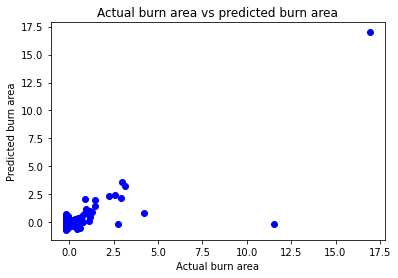

In [27]:
import matplotlib.pyplot as plt
y_pred=model.predict(pred)

plt.scatter(tar, y_pred,color='blue')
plt.title('Actual burn area vs predicted burn area')
plt.xlabel('Actual burn area')
plt.ylabel('Predicted burn area')
plt.show()

In [28]:
from sklearn.metrics import r2_score
r2_score(tar,y_pred)

0.6522033708987867

The model's delivered a quite decent performance on wildfires with burn areas that were within 3 standard deviations of the mean, which was the majority of the wildfires in the dataset. The model predicted the extreme outlier as well: the one that is 17.5 standard deviations above the mean. 

<a id='ML_with_TensorFlow'></a>
#### II. Multiple linear regression with TensorFlow

Let's try TensorFlow and see what we can get.

(14) Import the libraries for TensorFlow.

In [16]:
import matplotlib.pyplot as plt
import pylab as pl
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/conda/envs/python/lib/python3

In [17]:
pred=np.matrix(pred.values)
tar=np.matrix(tar.values)

pred_data=pred.transpose()
tar_data=tar.transpose()

n=6

# Define data placeholders
x = tf.placeholder(tf.float32, shape=(n, None))
y = tf.placeholder(tf.float32, shape=(1, None))

# Define trainable variables
A = tf.get_variable("A", shape=(1, n))
b = tf.get_variable("b", shape=())

# Define model output
y_predicted = tf.matmul(A, x) + b

# Define the loss function
L = tf.reduce_sum((y_predicted - tar)**2)

# Define optimizer object
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(L)

# Create a session and initialize variables
session = tf.Session()
session.run(tf.global_variables_initializer())

# Main optimization loop
loss_values=[]
for t in range(3000):
    _, current_loss, current_A, current_b = session.run([optimizer, L, A, b], feed_dict={
        x: pred_data,
        y: tar_data
    })
    loss_values.append(current_loss)
    if t %100 == 0:
        print("t = %g, loss = %g, A = %s, b = %g" % (t, current_loss, str(current_A), current_b))

t = 0, loss = 534086, A = [[-0.38   0.383  0.013  0.041 -0.315 -0.527]], b = 0.224442
t = 100, loss = 400224, A = [[-0.285  0.288  0.103  0.124 -0.225 -0.433]], b = 0.133243
t = 200, loss = 334809, A = [[-0.207  0.206  0.164  0.151 -0.163 -0.357]], b = 0.0682645
t = 300, loss = 303414, A = [[-0.148  0.137  0.196  0.132 -0.127 -0.296]], b = 0.0294851
t = 400, loss = 287524, A = [[-0.108  0.082  0.204  0.1   -0.106 -0.247]], b = 0.0105891
t = 500, loss = 279109, A = [[-0.085  0.038  0.197  0.072 -0.094 -0.207]], b = 0.00314621
t = 600, loss = 274497, A = [[-0.071  0.005  0.181  0.052 -0.084 -0.175]], b = 0.000770483
t = 700, loss = 271907, A = [[-0.063 -0.017  0.162  0.037 -0.075 -0.148]], b = 0.00015451
t = 800, loss = 270406, A = [[-0.057 -0.032  0.142  0.028 -0.065 -0.127]], b = 2.51107e-05
t = 900, loss = 269489, A = [[-0.051 -0.04   0.122  0.021 -0.055 -0.109]], b = 3.26067e-06
t = 1000, loss = 268884, A = [[-0.045 -0.043  0.104  0.016 -0.046 -0.095]], b = 3.31847e-07
t = 1100, loss

(15) Visualize the loss values.

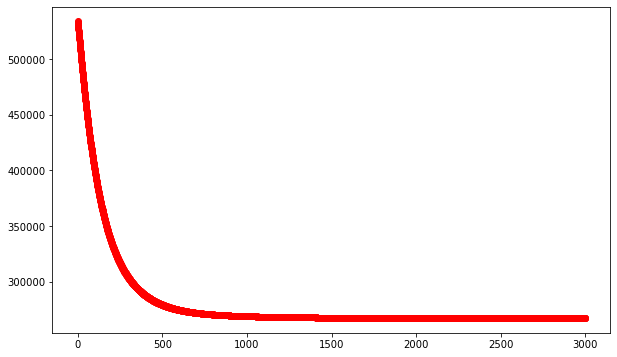

In [18]:
import matplotlib.pyplot as plt
plt.plot(loss_values, 'ro')

In [20]:
session.run([optimizer, L, A, b], feed_dict={x: pred_data,y: tar_data})

[None,
 267295.28,
 array([[-0.   , -0.001,  0.   ,  0.   ,  0.   , -0.001]], dtype=float32),
 6.477745e-10]

In [24]:
import numpy as np
from sklearn.metrics import r2_score
A=np.array([[-0.   , -0.001,  0.   ,  0.   ,  0.   , -0.001]])
b=6.477745e-10
y_pred=A@pred_data+b
r2_score(tar_data,y_pred)

0.0

The multiple linear regression model has no predictive power on test data.

Let's try Support Vector Machine (SVM) for regression as well.

<a id='SVM_for_regression'></a>
#### III. Support Vector Machine (SVM) for regression

(16) Split the data into train and test subsets.

**Before the split, restart the Kernel and re-run (1) to (10).**

In [16]:
# split the dataset into train set and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pred,tar, test_size=0.3,random_state=12)

(17) Build the SVM regression model and fit it

In [17]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly')
regressor.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

(18) Test the model on test data.

In [18]:
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 

(19) Visualize how the actual burn area compares to the burn area predicted by SVM for regression.

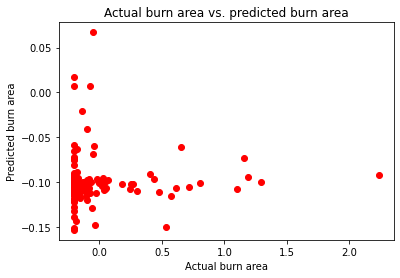

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Actual burn area vs. predicted burn area')
plt.xlabel('Actual burn area')
plt.ylabel('Predicted burn area')
plt.show()

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.022986214087521883

Let's give another try to the SVM model with a different set of predictor variables. **We need to re-run (1) to (8) before proceeding any further.**

In [13]:
X=pred[["temp","RH","wind","rain","FFMC","DMC"]]
X.head()

,temp,RH,wind,rain,FFMC,DMC
0,8.2,51,6.7,0.0,86.2,26.2
1,18.0,33,0.9,0.0,90.6,35.4
2,14.6,33,1.3,0.0,90.6,43.7
3,8.3,97,4.0,0.2,91.7,33.3
4,11.4,99,1.8,0.0,89.3,51.3


In [14]:
from sklearn import preprocessing
names=X.columns
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=names)
X.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,temp,RH,wind,rain,FFMC,DMC
0,-1.842640,0.411724,1.498614,-0.073268,-0.805959,-1.323326
1,-0.153278,-0.692456,-1.741756,-0.073268,-0.008102,-1.179541
2,-0.739383,-0.692456,-1.518282,-0.073268,-0.008102,-1.049822
3,-1.825402,3.233519,-0.009834,0.603155,0.191362,-1.212361
4,-1.291012,3.356206,-1.238940,-0.073268,-0.243833,-0.931043


In [15]:

names=tar.columns
scaler=preprocessing.StandardScaler()
y=scaler.fit_transform(tar)
y=pd.DataFrame(y, columns=names)
y

,area
0,-0.202020
1,-0.202020
2,-0.202020
3,-0.202020
4,-0.202020
...,...
512,-0.100753
513,0.651674
514,-0.026532
515,-0.202020


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=12)

In [17]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly')
regressor.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

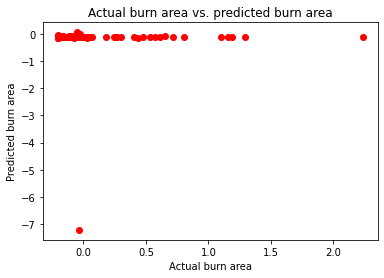

In [18]:
y_pred = regressor.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Actual burn area vs. predicted burn area')
plt.xlabel('Actual burn area')
plt.ylabel('Predicted burn area')
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-2.9438025289539875

The result of the second try on SVM for regression was worse than initial result.

**The multiple linear regression model and the SVM have no predictive power on data that was not used to train the model. However, the neural network regression model is descent. We could have stopped after the neural network regression model.**